In [ ]:
import torch
from timm.data.mixup import Mixup
from timm.data.dataset import ImageDataset
from timm.data.loader import create_loader
import os 
import numpy as np 
import torch 
import time
import timm
import random
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim #for gradient descent

# alexnet
import torchvision.models

import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt

In [ ]:
data_dir = './Snake_Images/'
train_dir = os.path.join(data_dir,'train/')
test_dir = os.path.join(data_dir,'test/')


classes = ["Non_Venomous" , "Venomous"]
data_transform = transforms.Compose([transforms.Resize([224,224]), transforms.ToTensor()])
train_data = datasets.ImageFolder(train_dir, transform = data_transform)
test_data = datasets.ImageFolder(test_dir, transform = data_transform)

print('Num training images' , len(train_data))  # it opens up all the images in the folder
print('Num test images', len(test_data))

Num training images 1775
Num test images 192


In [ ]:
batch_size = 36

train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size, shuffle = True)

<ipython-input-4-82b2ddc7ad6d>:11: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])


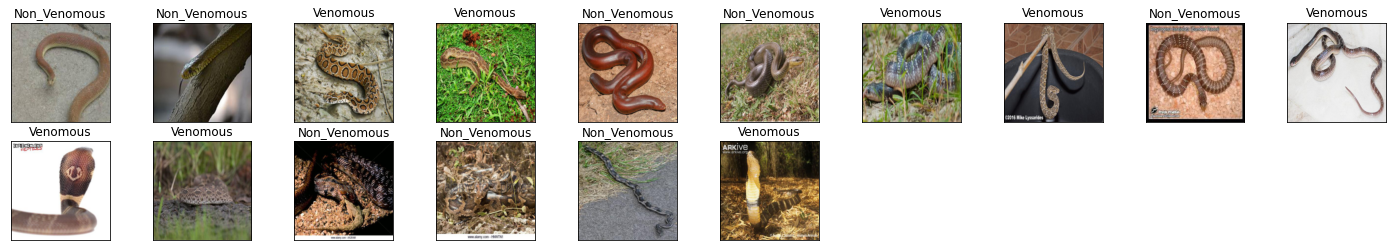

In [ ]:
# Visualize some sample data

# obtain one batch of training images
dataiter = iter(train_loader)   # get the image from train_loader
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(16):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title(classes[labels[idx]])

In [ ]:
model = timm.create_model('regnety_002', pretrained=True)
model

RegNet(
  (stem): ConvBnAct(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn): BatchNormAct2d(
      32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (act): ReLU(inplace=True)
    )
  )
  (s1): RegStage(
    (b1): Bottleneck(
      (conv1): ConvBnAct(
        (conv): Conv2d(32, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNormAct2d(
          24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
          (act): ReLU(inplace=True)
        )
      )
      (conv2): ConvBnAct(
        (conv): Conv2d(24, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=3, bias=False)
        (bn): BatchNormAct2d(
          24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
          (act): ReLU(inplace=True)
        )
      )
      (se): SEModule(
        (fc1): Conv2d(24, 8, kernel_size=(1, 1), stride=(1, 1))
        (bn): Identity()
        (act): ReLU(inplace=True)


In [ ]:
def get_accuracy(model,small_loader):
    
    data_loader = small_loader


    correct = 0
    total = 0
    for imgs, labels in data_loader:
        
         
        #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
        #############################################
        
        
        output = model(imgs)
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1] # predication to find how many is correct
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

In [ ]:
model.cuda()

RegNet(
  (stem): ConvBnAct(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn): BatchNormAct2d(
      32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (act): ReLU(inplace=True)
    )
  )
  (s1): RegStage(
    (b1): Bottleneck(
      (conv1): ConvBnAct(
        (conv): Conv2d(32, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNormAct2d(
          24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
          (act): ReLU(inplace=True)
        )
      )
      (conv2): ConvBnAct(
        (conv): Conv2d(24, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=3, bias=False)
        (bn): BatchNormAct2d(
          24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
          (act): ReLU(inplace=True)
        )
      )
      (se): SEModule(
        (fc1): Conv2d(24, 8, kernel_size=(1, 1), stride=(1, 1))
        (bn): Identity()
        (act): ReLU(inplace=True)


# testing on the model using single image

<ipython-input-8-0fb7472bb997>:11: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])


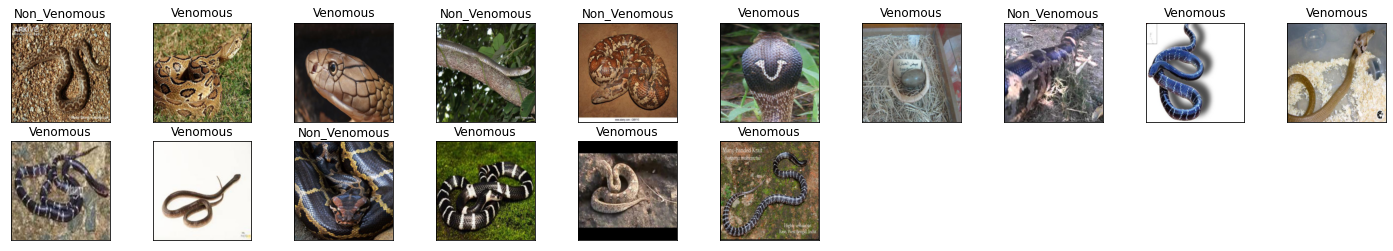

In [ ]:
# Visualize some sample data
train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, shuffle = True)
# obtain one batch of training images
dataiter = iter(train_loader)   # get the image from train_loader
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(16):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title(classes[labels[idx]])

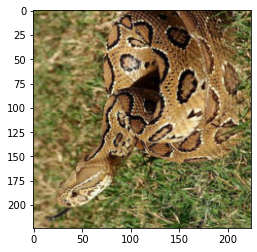

In [ ]:
images[1],labels[1]
plt.imshow(images[1].T)

In [ ]:
one_batch =  iter(train_loader)
imgs, label = one_batch.next()

In [ ]:
imgs = imgs.cuda()
out = model(imgs)
out.shape

torch.Size([36, 1000])

In [ ]:
nn.CrossEntropyLoss?

In [ ]:
# fully connected layer
class RegnetY_fc(nn.Module):
    def __init__(self):
        super(RegnetY_fc,self).__init__()
        self.regnety=timm.create_model('regnety_002', pretrained=True)
        self.fc1 = nn.Linear(1000, 256) # the ouput image size is 256*6*6, batch size was eliminated as shown before 
        self.fc2 = nn.Linear(256, 128) # Hidden units = 128
        self.fc3 = nn.Linear(128, 32) # Hidden units = 32
        self.fc4 = nn.Linear(32, 2)
        self.dropout=nn.Dropout(p=0.5) #This could be used to test Dropout

    def forward(self, x):
        x=self.regnety(x)
        x = x.view(-1, 1000) #flatten feature data
        x = F.relu(self.fc1(x))
        #x = self.dropout(x) used to test drop out, the location could be changed
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [ ]:
snakeModel = RegnetY_fc()

In [ ]:
snakeModel = snakeModel.cuda()
outAnn = snakeModel(imgs)
outAnn

tensor([[0.0327, 0.1919],
        [0.1822, 0.2508],
        [0.0430, 0.0565],
        [0.0033, 0.1082],
        [0.0972, 0.1411],
        [0.1117, 0.1706],
        [0.0359, 0.1772],
        [0.0312, 0.0616],
        [0.1469, 0.1028],
        [0.1122, 0.0563],
        [0.0344, 0.1227],
        [0.1133, 0.0249],
        [0.0855, 0.1431],
        [0.0928, 0.0938],
        [0.1242, 0.0944],
        [0.0509, 0.1314],
        [0.0281, 0.0916],
        [0.1458, 0.0986],
        [0.1202, 0.1873],
        [0.0532, 0.1367],
        [0.1913, 0.1071],
        [0.1244, 0.1558],
        [0.0925, 0.1885],
        [0.2205, 0.1114],
        [0.1194, 0.1327],
        [0.1586, 0.1509],
        [0.1170, 0.2364],
        [0.2119, 0.0894],
        [0.0266, 0.2199],
        [0.1366, 0.2202],
        [0.2807, 0.1888],
        [0.1021, 0.1628],
        [0.0557, 0.1302],
        [0.0636, 0.1299],
        [0.0706, 0.1552],
        [0.1756, 0.1319]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
def train(model,data,mx_args, batch_size=20, num_epochs=1, LR = 0.001):
    mx_fnc=Mixup(**mx_args)  # here is the mixup+cutmix code
    small_loader = torch.utils.data.DataLoader(data, batch_size=batch_size, shuffle=True) # batch size is the number of image that you want to process together 
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=LR, momentum=0.9)

    iters, losses, train_acc, val_acc, small_acc = [], [], [], [], []
    
#     AnnModel = AnnModel.cuda() # make the Ann model become cuda available
    # training
    n = 0 # the number of iterations
    start_time=time.time()
    for epoch in range(num_epochs):
        mini_b=0
        mini_batch_correct = 0
        Mini_batch_total = 0
        for imgs, labels in iter(small_loader):
          
            
            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
                imgs = imgs.cuda()
                labels = labels.cuda()
            #############################################

          #### ALNC is alexNet.features (AlexNet without classifier) ####
          
                       
            inputs, classes = mx_fnc(imgs, labels)
            out=model(inputs)
            loss=criterion(out,classes)
            loss.backward()   
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch
            n += 1  


            ##### Mini_batch Accuracy ##### We don't compute accuracy on the whole trainig set in every iteration!
            ## after each batch size, it will update the weight of the model, update the weight based on 256 images
            # pred = out.max(1, keepdim=True)[1]
            # mini_batch_correct = pred.eq(labels.view_as(pred)).sum().item()
            # Mini_batch_total = imgs.shape[0]
            # small_acc.append((mini_batch_correct / Mini_batch_total)) # number of correct prediction over the number of prediction that you make
           ###########################

          # save the current training information
        iters.append(n)
        losses.append(float(loss)/batch_size)             # compute *average* loss
        
        small_acc.append(get_accuracy(model,small_loader))
          
            
            
            # mini_b += 1
            # print("Iteration: ",n,'accuracy',small_acc[n],'%', "Time Elapsed: % 6.2f s " % (time.time()-start_time))
            

        print ("Epoch %d Finished. " % epoch ,'accuracy',small_acc[epoch],"Time per Epoch: % 6.2f s "% ((time.time()-start_time) / (epoch +1)))


    end_time= time.time()
    # plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, small_acc, label="Small")
       
    plt.xlabel("Iterations")
    plt.ylabel("trainning Accuracy")
    plt.legend(loc='best')
    plt.show()

    
    print("Final Training Accuracy: {}".format(small_acc[-1]))
    #print("Final Validation Accuracy: {}".format(val_acc[-1]))
    print ("Total time:  % 6.2f s  Time per Epoch: % 6.2f s " % ( (end_time-start_time), ((end_time-start_time) / num_epochs) ))

Epoch 0 Finished.  accuracy 0.6146478873239437 Time per Epoch:  20.42 s 
Epoch 1 Finished.  accuracy 0.7267605633802817 Time per Epoch:  20.32 s 
Epoch 2 Finished.  accuracy 0.8090140845070423 Time per Epoch:  20.42 s 
Epoch 3 Finished.  accuracy 0.8664788732394366 Time per Epoch:  20.38 s 
Epoch 4 Finished.  accuracy 0.9188732394366197 Time per Epoch:  20.40 s 
Epoch 5 Finished.  accuracy 0.9504225352112676 Time per Epoch:  20.42 s 
Epoch 6 Finished.  accuracy 0.9774647887323944 Time per Epoch:  20.46 s 
Epoch 7 Finished.  accuracy 0.976338028169014 Time per Epoch:  20.40 s 
Epoch 8 Finished.  accuracy 0.9864788732394366 Time per Epoch:  20.39 s 
Epoch 9 Finished.  accuracy 0.9887323943661972 Time per Epoch:  20.34 s 
Epoch 10 Finished.  accuracy 0.9904225352112676 Time per Epoch:  20.36 s 
Epoch 11 Finished.  accuracy 0.992112676056338 Time per Epoch:  20.37 s 
Epoch 12 Finished.  accuracy 0.9954929577464788 Time per Epoch:  20.40 s 
Epoch 13 Finished.  accuracy 0.9949295774647887 Ti

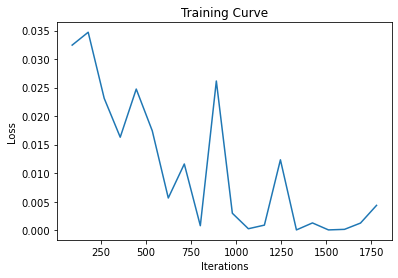

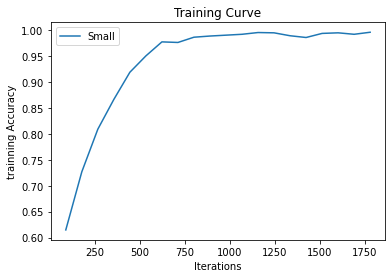

Final Training Accuracy: 0.9960563380281691
Total time:   407.41 s  Time per Epoch:  20.37 s 


In [ ]:
use_cuda = True
mixup_args = {   #parameters for setting up the mixup and cutmix
    'mixup_alpha': 0.5,
    'cutmix_alpha': 0.,
    'cutmix_minmax': None,
    'prob': 1.0,
    'switch_prob': 0.,
    'mode': 'batch',
    'label_smoothing': 0,
    'num_classes': 2}
snakeModel = snakeModel.cuda()
train(snakeModel, train_data,mixup_args,batch_size = 20, num_epochs = 20, LR = 0.001)

In [ ]:
dataiter = iter(test_loader)   # get the image from train_loader
images, labels = dataiter.next()

In [ ]:
images,labels

(tensor([[[[0.3294, 0.2980, 0.2902,  ..., 0.4471, 0.4235, 0.4039],
           [0.3098, 0.3020, 0.3137,  ..., 0.4078, 0.4078, 0.4118],
           [0.3922, 0.3922, 0.3765,  ..., 0.3686, 0.4039, 0.4314],
           ...,
           [0.6431, 0.6078, 0.6039,  ..., 0.6392, 0.6078, 0.5922],
           [0.6275, 0.6118, 0.6078,  ..., 0.6314, 0.6157, 0.5922],
           [0.6353, 0.6392, 0.6471,  ..., 0.6510, 0.6196, 0.5725]],
 
          [[0.3176, 0.2706, 0.2431,  ..., 0.3804, 0.3765, 0.3725],
           [0.2863, 0.2627, 0.2588,  ..., 0.3569, 0.3686, 0.3765],
           [0.3412, 0.3333, 0.3137,  ..., 0.3412, 0.3686, 0.3882],
           ...,
           [0.6314, 0.5961, 0.5882,  ..., 0.6157, 0.5961, 0.5922],
           [0.6157, 0.6000, 0.5961,  ..., 0.6078, 0.6078, 0.5922],
           [0.6196, 0.6235, 0.6314,  ..., 0.6275, 0.6118, 0.5725]],
 
          [[0.2353, 0.1961, 0.1882,  ..., 0.2902, 0.2627, 0.2392],
           [0.2000, 0.1882, 0.2000,  ..., 0.2588, 0.2510, 0.2471],
           [0.2510, 0.25

In [ ]:
pred = snakeModel(images.cuda())

In [ ]:
# comparison between the prediction and the actual result
pred = pred.max(1, keepdim=True)[1]
np.squeeze(pred,1),labels

(tensor([1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
         0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1], device='cuda:0'),
 tensor([1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
         1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1]))

In [ ]:
test_accuracy_test = get_small_accuracy(snakeModel,test_loader)
print("test accuracy_test:", test_accuracy_test)

test accuracy_test: 0.8489583333333334
